# **Data Cleaning**


In [49]:
import pandas as pd
from IPython.display import display


file_path = '/content/Data BPS 2.xlsx'
xls = pd.ExcelFile(file_path)

kab_bandung_df = pd.read_excel(xls, sheet_name='Kab Bandung', header=2)


kab_bandung_df = kab_bandung_df.dropna(how='all', axis=1)
kab_bandung_df = kab_bandung_df.dropna(how='all')


print("Available columns:", kab_bandung_df.columns.tolist())

columns_to_keep = ['JUMLAH PENDUDUK', 'LUAS WILAYAH (KM)', 'JUMLAH RUMAH',
                   'JUMLAH SEKOLAH\n(SMP-SMA)', 'JUMLAH RS',
                   'Usia 15-64 (%)', 'Kompetitor']

kab_bandung_clean = kab_bandung_df[columns_to_keep]

kab_bandung_clean = kab_bandung_clean.fillna(0)

display(kab_bandung_clean)


Available columns: ['NO', 'NAMA KECAMATAN', 'JUMLAH PENDUDUK', '% LUAS WILAYAH ', 'LUAS WILAYAH (KM)', 'JUMLAH DESA', 'JUMLAH RUMAH', 'JENIS RUMAH', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'JUMLAH RT', 'JUMLAH RW', 'JUMLAH SEKOLAH (TK)', 'JUMLAH SEKOLAH (RA)', 'JUMLAH SEKOLAH (SD)', 'JUMLAH SEKOLAH (MI)', 'JUMLAH SEKOLAH (SMP)', 'JUMLAH SEKOLAH (MTS)', 'JUMLAH SEKOLAH (SMA)', 'JUMLAH SEKOLAH (SMK)', 'JUMLAH SEKOLAH (MA)', 'JUMLAH SEKOLAH\n(SMP-SMA)', 'JUMLAH RS', 'Usia 15-64 (%)', 'JENIS SINYAL', 'Sinyal Telp Seluler', 'Penggunaan Listrik PLN', 'Kompetitor', 'Unnamed: 31']


,JUMLAH PENDUDUK,LUAS WILAYAH (KM),JUMLAH RUMAH,JUMLAH SEKOLAH\n(SMP-SMA),JUMLAH RS,Usia 15-64 (%),Kompetitor
0,0.0,0.000,0.0,0.0,0,0.000,Indihome
1,89863.0,48.466,20892.0,24.0,-,61466.292,ada
2,51589.0,148.370,10887.0,12.0,-,35286.876,ada
3,93775.0,239.580,25805.0,25.0,-,64142.100,ada
4,89418.0,55.000,22143.0,26.0,1,61161.912,ada
5,157296.0,195.410,39204.0,25.0,-,107590.464,ada
6,72183.0,152.070,15942.0,16.0,-,49373.172,ada
7,118278.0,91.940,28307.0,62.0,-,80902.152,ada
8,89712.0,54.570,21331.0,33.0,1,61363.008,ada
9,140119.0,51.030,32348.0,43.0,-,95841.396,ada


# **Data Transformation**

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_path = '/content/Data BPS 2.xlsx'  # Replace with your file path
xls = pd.ExcelFile(file_path)

kab_bandung_df = pd.read_excel(xls, sheet_name='Kab Bandung', header=2)

kab_bandung_df = kab_bandung_df.dropna(how='all', axis=1).dropna(how='all')

kab_bandung_df['JUMLAH PENDUDUK'] = kab_bandung_df['JUMLAH PENDUDUK'].fillna(0).astype(int)

scaler = MinMaxScaler()
kab_bandung_df['LUAS WILAYAH (KM)_Normalized'] = scaler.fit_transform(kab_bandung_df[['LUAS WILAYAH (KM)']].fillna(0))

kab_bandung_df['Penduduk_per_KM'] = kab_bandung_df['JUMLAH PENDUDUK'] / kab_bandung_df['LUAS WILAYAH (KM)']

median_desa = kab_bandung_df['JUMLAH DESA'].median()
kab_bandung_df['JUMLAH DESA'] = kab_bandung_df['JUMLAH DESA'].fillna(median_desa)

def categorize_rumah(value):
    if value > 20000:
        return 'Large'
    elif value > 10000:
        return 'Medium'
    else:
        return 'Small'

kab_bandung_df['Kategori_Jenis_Rumah'] = kab_bandung_df['JUMLAH RUMAH'].apply(lambda x: categorize_rumah(x))

display(kab_bandung_df)


,NO,NAMA KECAMATAN,JUMLAH PENDUDUK,% LUAS WILAYAH,LUAS WILAYAH (KM),JUMLAH DESA,JUMLAH RUMAH,JENIS RUMAH,Unnamed: 9,Unnamed: 10,...,JUMLAH RS,Usia 15-64 (%),JENIS SINYAL,Sinyal Telp Seluler,Penggunaan Listrik PLN,Kompetitor,Unnamed: 31,LUAS WILAYAH (KM)_Normalized,Penduduk_per_KM,Kategori_Jenis_Rumah
0,NaN,NaN,0,NaN,NaN,9.0,NaN,TEMBOK,PLESTERAN,KAYU,...,NaN,NaN,NaN,NaN,NaN,Indihome,Lokal,0.000000,NaN,Small
1,1.0,Kecamatan Ciwidey,89863,0.0275,48.466,7.0,20892.0,16914.1632,463.8024,1715.2332,...,-,61466.292,NaN,NaN,NaN,ada,ada,0.202296,1854.145174,Large
2,2.0,Kecamatan Rancabali,51589,0.0842,148.370,5.0,10887.0,8814.1152,241.6914,893.8227,...,-,35286.876,NaN,NaN,NaN,ada,ada,0.619292,347.705062,Medium
3,3.0,Kecamatan Pasirjambu,93775,0.1359,239.580,10.0,25805.0,20891.728,572.871,2118.5905,...,-,64142.100,NaN,NaN,NaN,ada,ada,1.000000,391.414141,Large
4,4.0,Kecamatan Cimaung,89418,0.0312,55.000,10.0,22143.0,17926.9728,491.5746,1817.9403,...,1,61161.912,NaN,NaN,NaN,ada,ada,0.229568,1625.781818,Large
5,5.0,Kecamatan Pangalengan,157296,0.1109,195.410,13.0,39204.0,31739.5584,870.3288,3218.6484,...,-,107590.464,NaN,NaN,NaN,ada,ada,0.815636,804.953687,Large
6,6.0,Kecamatan Kertasari,72183,0.0863,152.070,8.0,15942.0,12906.6432,353.9124,1308.8382,...,-,49373.172,NaN,NaN,NaN,ada,ada,0.634736,474.669560,Medium
7,7.0,Kecamatan Pacet,118278,0.0522,91.940,13.0,28307.0,22917.3472,628.4154,2324.0047,...,-,80902.152,NaN,NaN,NaN,ada,tidak,0.383755,1286.469437,Large
8,8.0,Kecamatan Ibun,89712,0.0310,54.570,12.0,21331.0,17269.5776,473.5482,1751.2751,...,1,61363.008,NaN,NaN,NaN,ada,tidak,0.227774,1643.980209,Large
9,9.0,Kecamatan Paseh,140119,0.0290,51.030,12.0,32348.0,26188.9408,718.1256,2655.7708,...,-,95841.396,NaN,NaN,NaN,ada,ada,0.212998,2745.816187,Large


## **EDA**


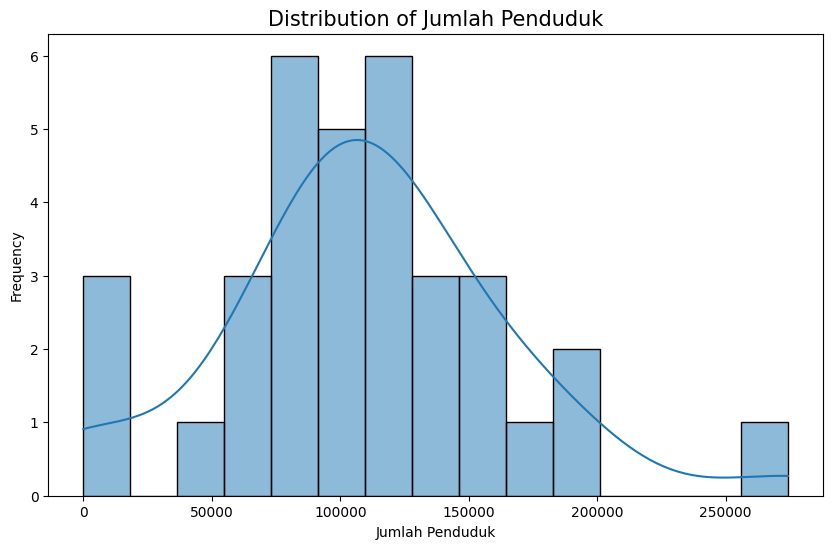

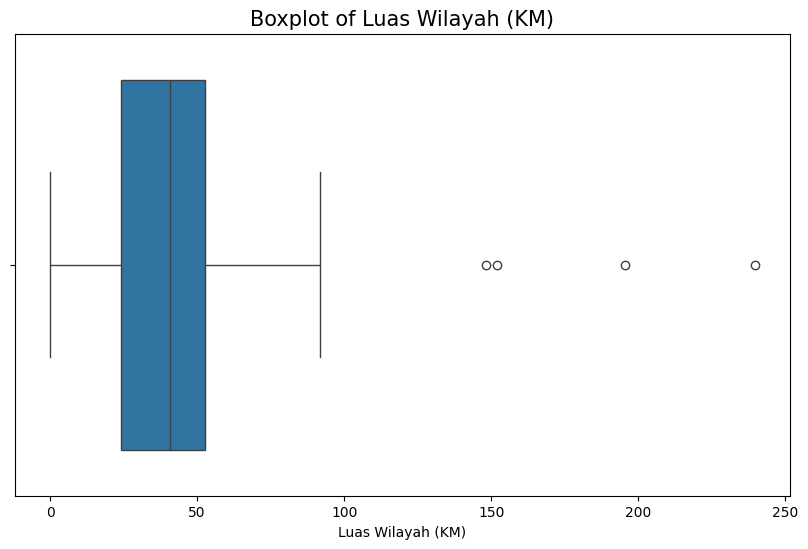

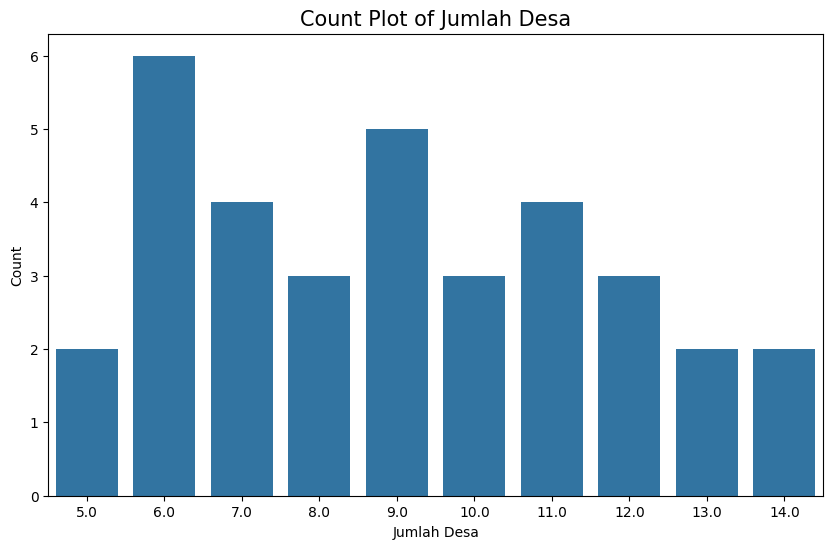

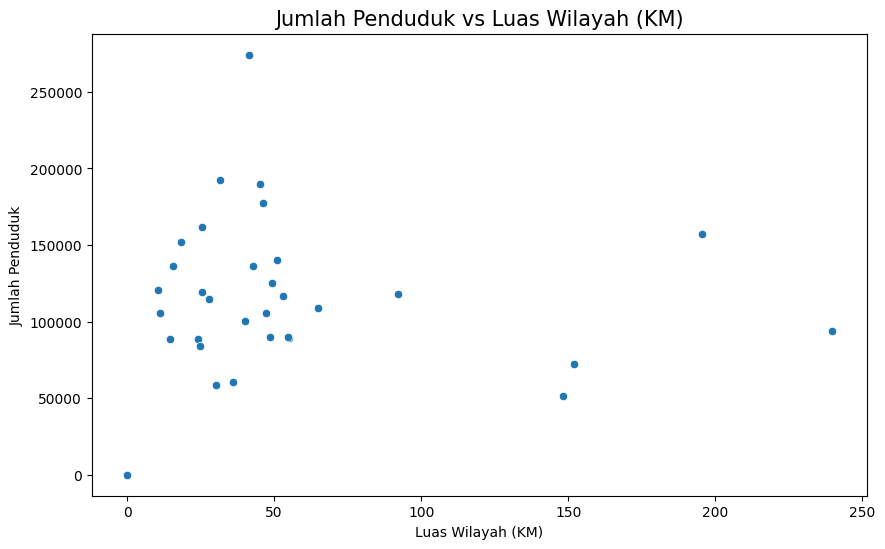

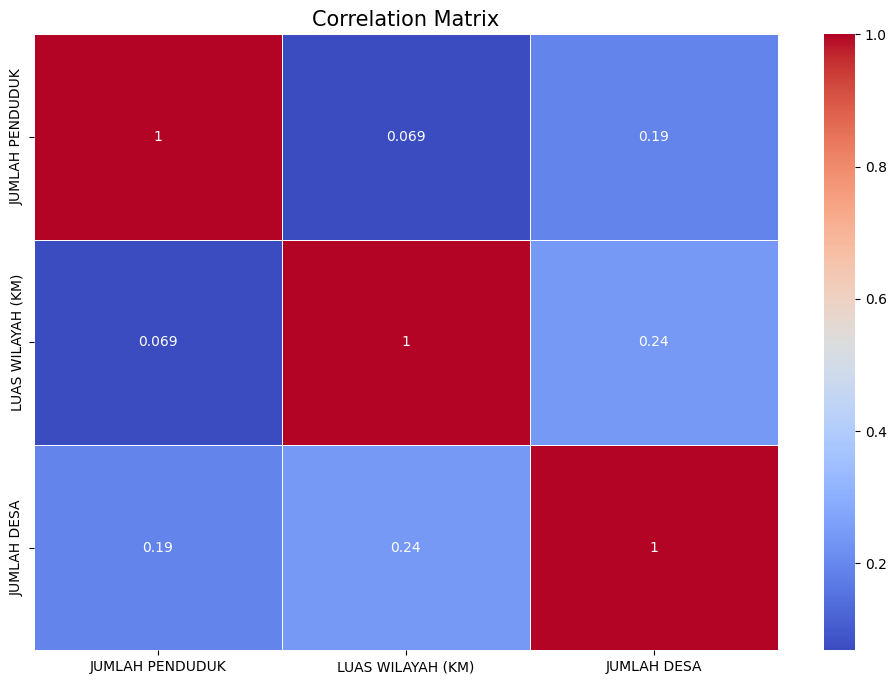

<Figure size 1200x800 with 0 Axes>

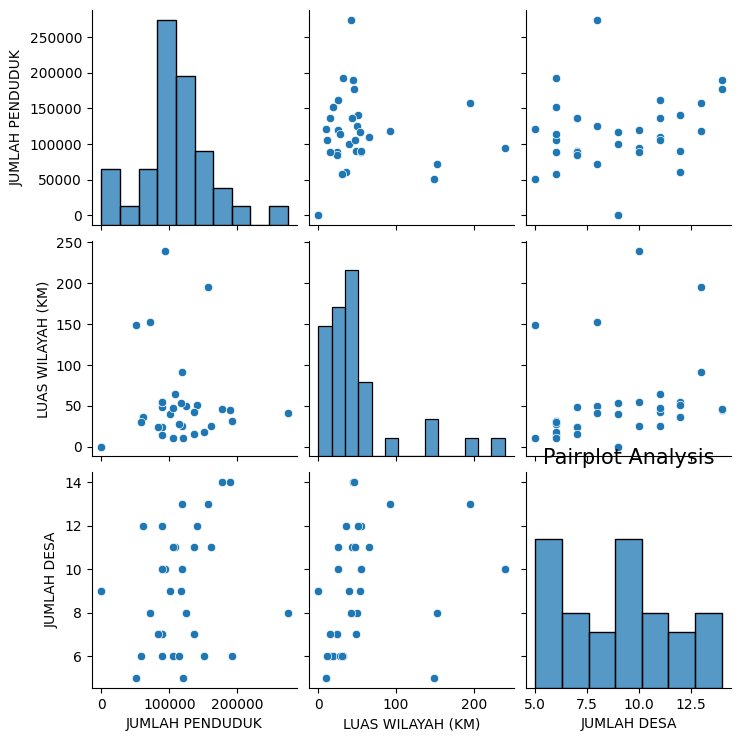

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/Data BPS 2.xlsx'
xls = pd.ExcelFile(file_path)

kab_bandung_df = pd.read_excel(xls, sheet_name='Kab Bandung', header=2)

kab_bandung_df = kab_bandung_df.dropna(how='all', axis=1).dropna(how='all')

kab_bandung_df['JUMLAH PENDUDUK'] = kab_bandung_df['JUMLAH PENDUDUK'].fillna(0).astype(int)
kab_bandung_df['LUAS WILAYAH (KM)'] = kab_bandung_df['LUAS WILAYAH (KM)'].fillna(0)
kab_bandung_df['JUMLAH DESA'] = kab_bandung_df['JUMLAH DESA'].fillna(kab_bandung_df['JUMLAH DESA'].median())


plt.figure(figsize=(10, 6))
sns.histplot(kab_bandung_df['JUMLAH PENDUDUK'], kde=True, bins=15)
plt.title('Distribution of Jumlah Penduduk', fontsize=15)
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=kab_bandung_df['LUAS WILAYAH (KM)'])
plt.title('Boxplot of Luas Wilayah (KM)', fontsize=15)
plt.xlabel('Luas Wilayah (KM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=kab_bandung_df['JUMLAH DESA'])
plt.title('Count Plot of Jumlah Desa', fontsize=15)
plt.xlabel('Jumlah Desa')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=kab_bandung_df['LUAS WILAYAH (KM)'], y=kab_bandung_df['JUMLAH PENDUDUK'])
plt.title('Jumlah Penduduk vs Luas Wilayah (KM)', fontsize=15)
plt.xlabel('Luas Wilayah (KM)')
plt.ylabel('Jumlah Penduduk')
plt.show()

plt.figure(figsize=(12, 8))
corr_matrix = kab_bandung_df[['JUMLAH PENDUDUK', 'LUAS WILAYAH (KM)', 'JUMLAH DESA']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(kab_bandung_df[['JUMLAH PENDUDUK', 'LUAS WILAYAH (KM)', 'JUMLAH DESA']])
plt.title('Pairplot Analysis', fontsize=15)
plt.show()


# **K MEANS**

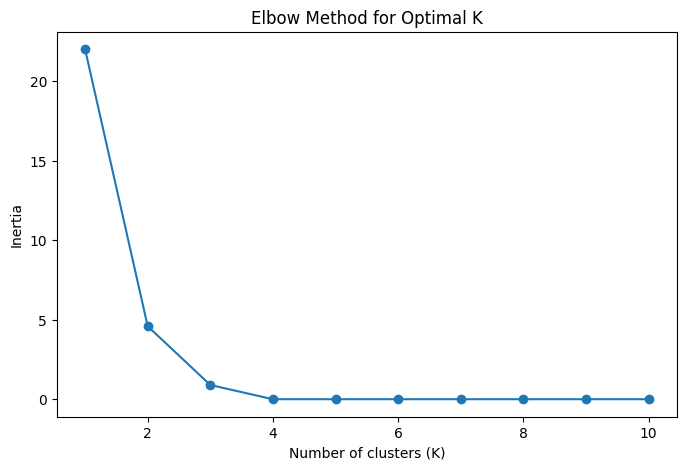

Shape of data_scaled: (22, 1)
Not enough samples or features for PCA. Reducing to 1 component.


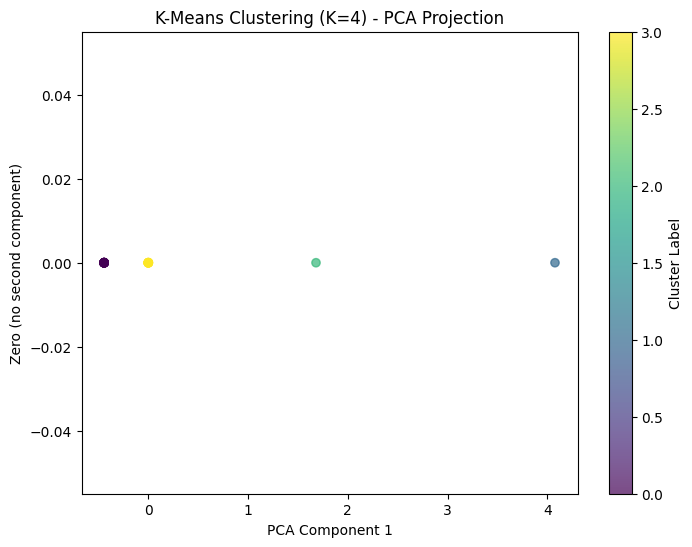

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

if 'data_scaled' not in locals():
    raise ValueError("data_scaled is not defined. Make sure to scale your data.")


inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)

print("Shape of data_scaled:", data_scaled.shape)

if data_scaled.shape[0] >= 2 and data_scaled.shape[1] >= 2:
    pca = PCA(n_components=2)
else:
    print("Not enough samples or features for PCA. Reducing to 1 component.")
    pca = PCA(n_components=1)

data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1] if data_scaled.shape[1] > 1 else np.zeros(data_pca.shape[0]),
                      c=cluster_labels, cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
if data_scaled.shape[1] > 1:
    plt.ylabel('PCA Component 2')
else:
    plt.ylabel('Zero (no second component)')
plt.title(f'K-Means Clustering (K={optimal_k}) - PCA Projection')
plt.show()